In [208]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [209]:
Image_size = 256
Batch_size = 32
Channels = 3
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size =(Image_size,Image_size),
    batch_size = Batch_size
)

Found 2152 files belonging to 3 classes.


In [210]:
class_names=  dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [211]:
len(dataset)

68

In [212]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 1 2 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 2 0 1 1 1 1]


In [213]:
for image_batch,label_batch in dataset.take(1):
        # print(image_batch[0])
        # print(image_batch[0].numpy())
        print(image_batch[0].numpy().shape)

(256, 256, 3)


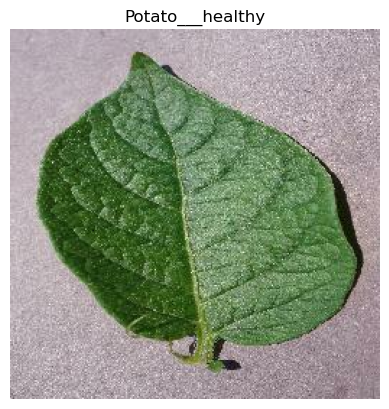

In [214]:
for image_batch,label_batch in dataset.take(1):
    # plt.imshow(image_batch[0].numpy())
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[0]])

2024-08-12 06:24:48.446243: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


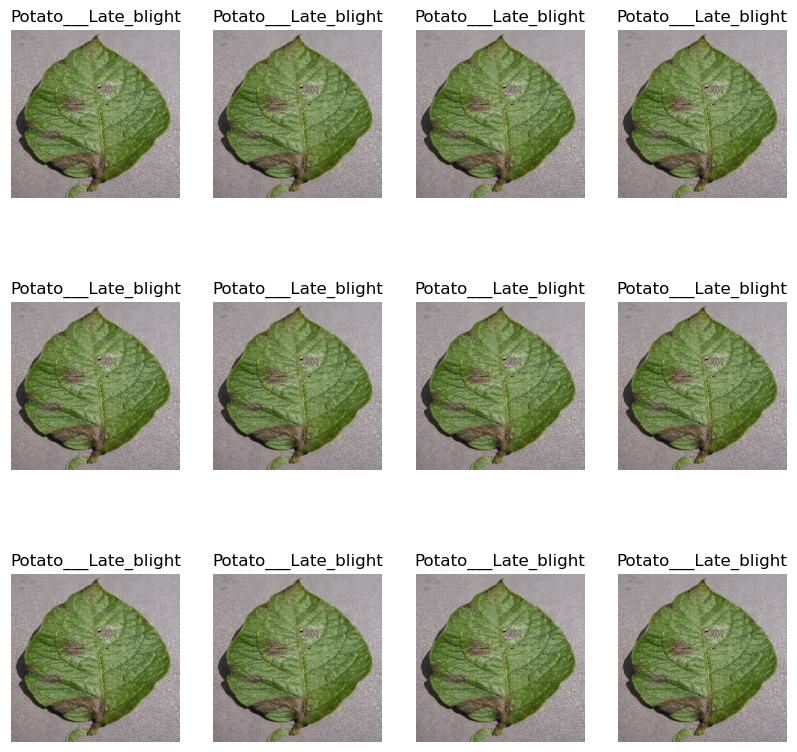

In [215]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for  i in range(12):
        ax = plt.subplot(3,4,i+1)
        # plt.imshow(image_batch[0].numpy())
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[0]])

In [216]:
Epochs =50

In [217]:
len(dataset)

68

In [218]:
# 80% ==> training
# 20% ==> 10% validation,10% test


In [219]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [220]:
train_ds = dataset.take(54)
len(train_ds)

54

In [221]:
test_ds = dataset.skip(54)
len(train_ds)

54

In [222]:
val_size = 0.1
len(dataset)*val_size

# so basically i need 6 sample from my test dataset

6.800000000000001

In [223]:
val_ds = test_ds.take(6)
len(val_ds)


6

In [224]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [225]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [226]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [227]:
len(train_ds)

54

In [228]:
len(val_ds)

6

In [229]:
len(test_ds)

8

In [230]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [231]:
# pip install tensorflow==2.6


In [232]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [233]:
# resize_and_rescale = tf.keras.Sequential([
#   layers.experimental.preprocessing.Resizing(Image_size, Image_size),
#   layers.experimental.preprocessing.Rescaling(1./255),
# ])
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1./255),
])


In [234]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [235]:
# input_shape = (Image_size,Image_size)
input_shape = (Batch_size ,Image_size,Image_size,Channels)

In [236]:
# input_shape = (IMAGE_SIZE, IMAGE_SIZE)
n_classes = 3 
model = models.Sequential([



    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D (64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation ='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation ='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), layers.Dense (64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape) 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [237]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_17 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_18 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [238]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [239]:
history = model.fit(
    train_ds,epochs = Epochs,batch_size = Batch_size,verbose = 1,validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 797ms/step - accuracy: 0.4783 - loss: 0.9352 - val_accuracy: 0.4531 - val_loss: 0.9136
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 759ms/step - accuracy: 0.6216 - loss: 0.7811 - val_accuracy: 0.7031 - val_loss: 0.5638
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 837ms/step - accuracy: 0.8106 - loss: 0.4350 - val_accuracy: 0.9375 - val_loss: 0.2022
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 936ms/step - accuracy: 0.8508 - loss: 0.3375 - val_accuracy: 0.8021 - val_loss: 0.4213
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 948ms/step - accuracy: 0.8706 - loss: 0.3184 - val_accuracy: 0.9219 - val_loss: 0.2234
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 925ms/step - accuracy: 0.8985 - loss: 0.2640 - val_accuracy: 0.8958 - val_loss: 0.2250
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 913ms/step - accuracy: 0.9041 - loss: 0.2233 - val_accuracy: 0.9479 - val_loss: 0.1401
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 937ms/step - accuracy: 0.9150 - loss: 0.2139 - val_accu

In [240]:
scores =model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.9600 - loss: 0.0654


In [241]:
scores


[0.0650821328163147, 0.96875]

In [242]:
history

In [243]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [244]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [245]:
history.history['accuracy']

[0.5017361044883728,
 0.6712962985038757,
 0.8368055820465088,
 0.8466435074806213,
 0.8842592835426331,
 0.8964120149612427,
 0.9114583134651184,
 0.9265046119689941,
 0.9490740895271301,
 0.9409722089767456,
 0.9490740895271301,
 0.953125,
 0.9670138955116272,
 0.9577546119689941,
 0.9704861044883728,
 0.9629629850387573,
 0.9513888955116272,
 0.9305555820465088,
 0.9803240895271301,
 0.9756944179534912,
 0.9751157164573669,
 0.9826388955116272,
 0.9791666865348816,
 0.9785879850387573,
 0.9878472089767456,
 0.9728009104728699,
 0.9872685074806213,
 0.9855324029922485,
 0.984375,
 0.984375,
 0.9866898059844971,
 0.9861111044883728,
 0.9728009104728699,
 0.9866898059844971,
 0.9681712985038757,
 0.9878472089767456,
 0.9884259104728699,
 0.984375,
 0.9820601940155029,
 0.9849537014961243,
 0.9907407164573669,
 0.9976851940155029,
 0.9872685074806213,
 0.9907407164573669,
 0.9907407164573669,
 0.9918981194496155,
 0.9942129850387573,
 0.9936342835426331,
 0.9785879850387573,
 0.98379629

In [266]:
len(history.history['accuracy'])

50

In [267]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss=history.history['loss']


val_loss = history.history['val_loss']

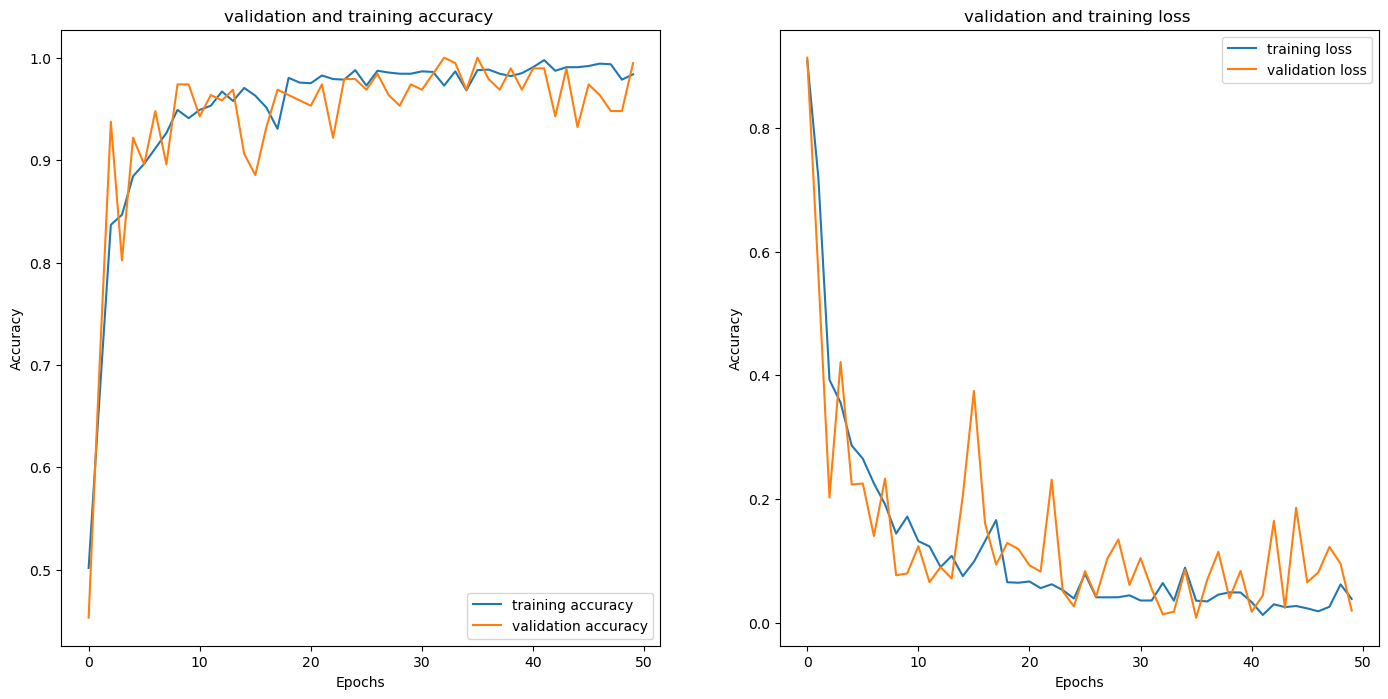

In [273]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label='training accuracy')
plt.plot(range(Epochs),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy') 
plt.title('validation and training accuracy ')

plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label='training loss')
plt.plot(range(Epochs),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('validation and training loss ')
plt.show()

[[[122 118 132]
  [127 123 137]
  [ 89  85  99]
  ...
  [156 165 172]
  [158 167 174]
  [167 176 183]]

 [[ 99  95 109]
  [138 134 148]
  [ 94  90 104]
  ...
  [154 163 172]
  [154 161 171]
  [155 164 173]]

 [[157 153 167]
  [162 158 172]
  [148 144 158]
  ...
  [164 170 182]
  [165 169 181]
  [160 166 178]]

 ...

 [[172 170 183]
  [178 176 189]
  [145 143 156]
  ...
  [191 194 203]
  [189 192 201]
  [186 189 198]]

 [[146 144 157]
  [127 125 138]
  [147 145 158]
  ...
  [180 183 192]
  [184 187 196]
  [184 187 196]]

 [[137 135 148]
  [140 138 151]
  [154 152 165]
  ...
  [184 187 196]
  [194 197 206]
  [200 203 212]]]


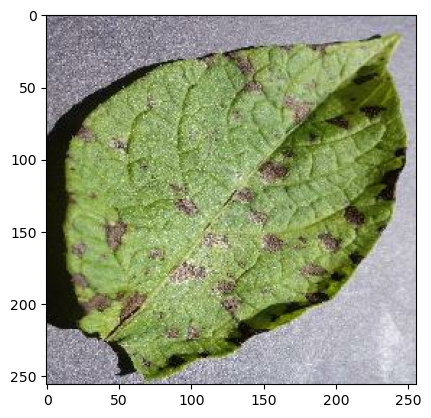

In [289]:
for image_batch,label_batch in test_ds.take(1):
    print(
        image_batch[0].numpy().astype('uint8')
    )
    plt.imshow(
        image_batch[0].numpy().astype('uint8')
    )




my first image to predict is 
 AxesImage(shape=(256, 256, 3))
my first image actual label
 Potato___healthy


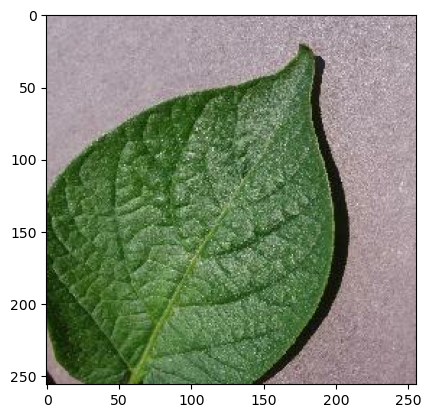

In [290]:
for image_batch,label_batch in test_ds.take(1):
   first_image = image_batch[0].numpy().astype('uint8')
   first_label = label_batch[0].numpy()


   print('my first image to predict is \n',plt.imshow(
        image_batch[0].numpy().astype('uint8')
    ))
   

   print('my first image actual label\n',class_names[first_label]
    )
   


   


In [291]:
for image_batch,label_batch in test_ds.take(1):
    batch_prediction = model.predict(image_batch)
    # print(batch_prediction[0])
    # print(batch_prediction)
    print("predicted label : ",class_names[numpy.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
predicted label :  Potato___Early_blight


In [292]:
import numpy
numpy.argmax([9.99999881e-01, 6.58164439e-08 ,3.59647948e-25])

0

In [301]:
def predict(model, img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims (img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[numpy.argmax(predictions[0])]

    confidence = round(100 * (numpy.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


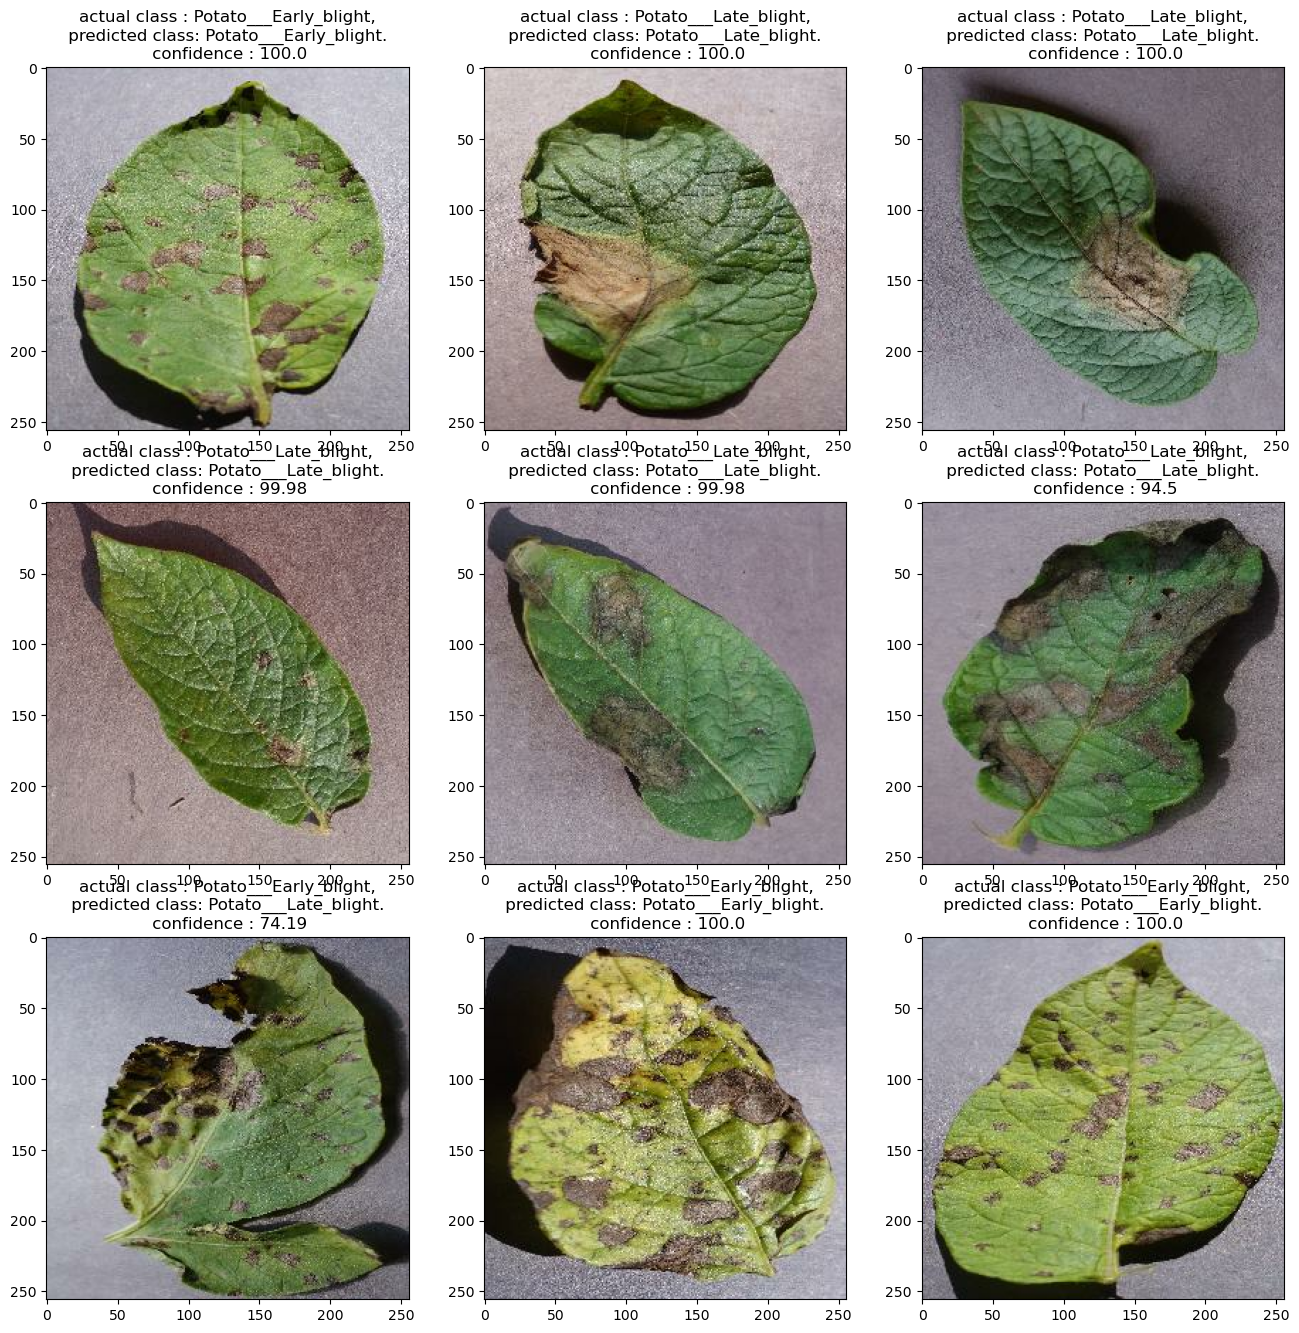

In [303]:
plt.figure(figsize=(16,16))
for images ,lables in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[lables[i]]

        plt.title(f"actual class : {actual_class},\n predicted class: {predicted_class}. \n confidence : {confidence}")

In [308]:
model.export('../models/1')


INFO:tensorflow:Assets written to: ../models/1/assets


INFO:tensorflow:Assets written to: ../models/1/assets


Saved artifact at '../models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_57')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  6408569680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6408577744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6436508816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6408578320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6408575056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6408570832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6408581392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6408570448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6408574864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6408581776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6408584080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6